# Maps around reservoirs

## To-dos
- [ ] trend maps for xarray data
- [x] area_subset of GRACE data (instead of point subset)
- [x] area_subset of IMERG data
- [x] area_subset of precip data
- [ ] 3 panel plot

In [1]:
func_dir = '/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/'

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray as rxr

import codebase

In [4]:
# fw_DA = codebase.load_data.load_CYGNSS_05()
grace_dict = codebase.load_data.load_GRACE()
res_shp = codebase.load_data.load_GRanD()
# precip_DA = codebase.load_data.load_IMERG()

In [4]:
dam_name = 'Davis Bor'
subset_gpd = codebase.area_subsets.check_for_multiple_dams(dam_name,res_shp)
# precip_multi , precip_full = codebase.area_subsets.precip_shape_subset(
#                      subset_gpd,
#                      precip_DA,
#                      buffer_val=0.25,
#                      crs_code=4326)

fw_multi , fw_full = codebase.area_subsets.cygnss_shape_subset(
                     subset_gpd,
                     fw_DA,
                     buffer_val=0.25,
                     crs_code=4326)
cmwe_multi , mascon_ts , cmwe_full = codebase.area_subsets.grace_shape_subset(
                        subset_gpd,
                        grace_dict,
                        buffer_val=0) 

/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/area_subsets.py:220: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clip_rxr = full_rxr.rio.clip(subset_gpd.geometry.buffer(buffer_val) , subset_gpd.crs)
/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/area_subsets.py:220: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clip_rxr = full_rxr.rio.clip(subset_gpd.geometry.buffer(buffer_val) , subset_gpd.crs)


In [5]:
dam_name = 'Nuozhadu'

subset_gpd = codebase.area_subsets.check_for_multiple_dams(dam_name,res_shp)

subset_bbox = subset_gpd.geometry.buffer(0).bounds
print(subset_bbox)
print(type(subset_bbox))
print(subset_bbox['miny'])
fw_DA = codebase.load_data.load_CYGNSS_001_all_months(subset_bbox.values[0])
fw_multi , fw_full = codebase.area_subsets.cygnss_shape_subset(
                     subset_gpd,
                     fw_DA,
                     buffer_val=0.1,
                     crs_code=4326)

           minx       miny        maxx       maxy
7162  99.793866  22.613617  100.811787  23.948103
<class 'pandas.core.frame.DataFrame'>
7162    22.613617
Name: miny, dtype: float64


/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/area_subsets.py:281: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clip_rxr = full_rxr.rio.clip(subset_gpd.geometry.buffer(buffer_val), subset_gpd.crs)
/global/home/users/ann_scheliga/.conda/envs/rioxarray_env/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:188: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


In [10]:
bbox_test = pd.DataFrame(data = np.array([0,0,45,45]).reshape(1,-1),columns = ['minx', 'miny', 'maxx', 'maxy'])

In [12]:
subset_test = codebase.load_data.load_CYGNSS_001_all_months(bbox_test.values[0])

In [13]:
subset_test.coords

Coordinates:
  * lat          (lat) float32 0.0 0.01 0.02 0.03 ... 37.37 37.38 37.39 37.4
  * lon          (lon) float32 0.0 0.01 0.02 0.03 ... 44.97 44.98 44.99 45.0
    spatial_ref  int64 0
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 ... 48 49 50 51 52 53 54 55 56

In [7]:
fw_DA.coords

Coordinates:
  * lat          (lat) float32 22.61 22.62 22.63 22.64 ... 23.93 23.94 23.95
  * lon          (lon) float32 99.79 99.8 99.81 99.82 ... 100.8 100.8 100.8
    spatial_ref  int64 0
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 ... 48 49 50 51 52 53 54 55 56

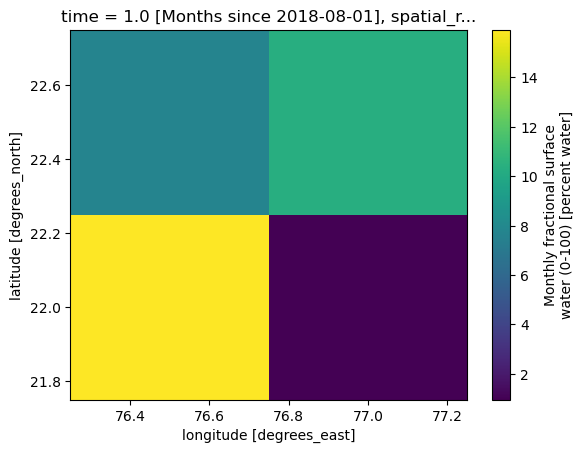

In [6]:
fw_multi.isel(time=1).plot()

## Map for AGU23

In [8]:
cygnss_filepath = '/global/scratch/users/cgerlein/fc_ecohydrology_scratch/CYGNSS/Data/CYGNSS_L1_v3_1_data_products/Monthly_maps_watermasks_glob2_netCDF/Native_size_0_01_deg/With_lakes/'
cygnss_filenames = os.listdir(cygnss_filepath)
cygnss_filenames.sort()

In [29]:
from matplotlib import colors
color_array = [[0.5, 0.5, 0.5, 0],
              [0, 0, 1, 0.8]]
custom_cmap = colors.ListedColormap(colors=color_array)

In [30]:
def CYGNSS_1month_plot(filename,
    bbox_vals,
    filepath='/global/scratch/users/cgerlein/fc_ecohydrology_scratch/CYGNSS/Data/CYGNSS_L1_v3_1_data_products/Monthly_maps_watermasks_glob2_netCDF/Native_size_0_01_deg/With_lakes/'
    ):
    clipped_rxr = load_data.load_CYGNSS_001_1month(filename,bbox_vals,filepath)
    clipped_rxr.plot(cmap = custom_cmap)
    return clipped_rxr

57

/tmp/ipykernel_25050/3822106219.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subset_bbox = subset_gpd.geometry.buffer(0.5).bounds


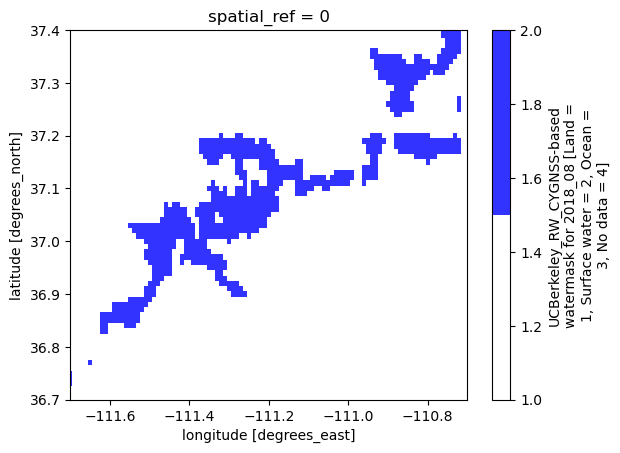

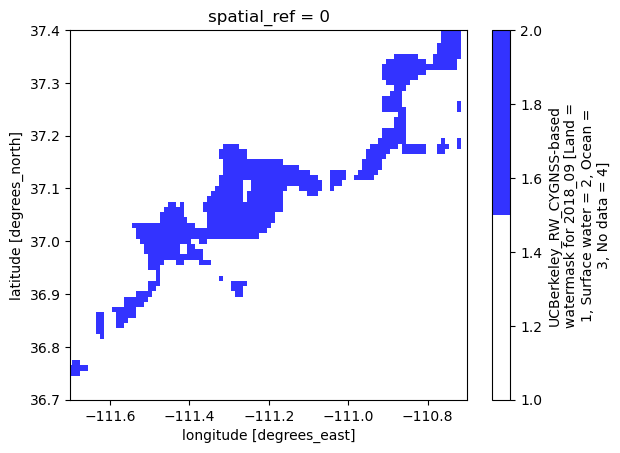

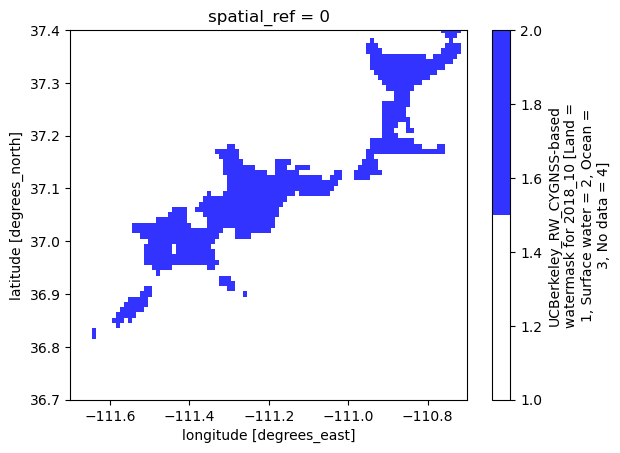

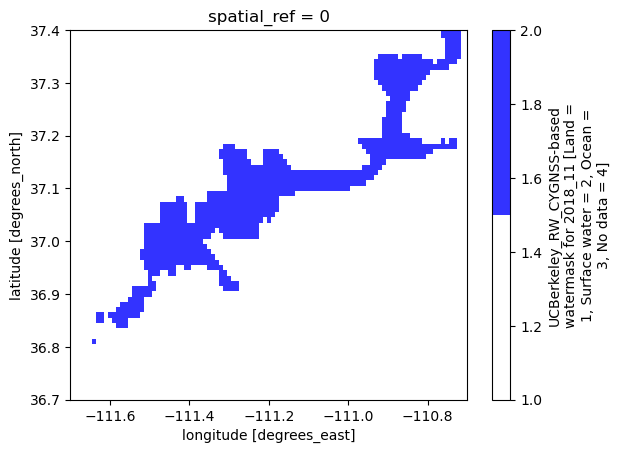

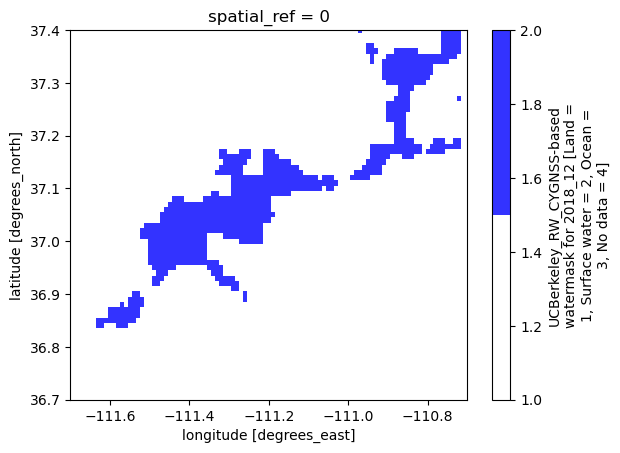

In [39]:
dam_name = 'Glen Canyon'
subset_gpd = codebase.area_subsets.check_for_multiple_dams(dam_name,res_shp)
subset_bbox = subset_gpd.geometry.buffer(0.5).bounds

small_list = cygnss_filenames[:5]
# fig , ax = plt.subplots()
artists = []
for filename in small_list:
    plt.figure()
    test_month = CYGNSS_1month_plot(filename,subset_bbox.values[0])
    plt.xlim([-111.7,-110.7])
    plt.ylim([36.7,37.4])


## Subset gpd by shp file

In [ ]:
def check_for_multiple_dams(dam_name,res_shp):
    """
    Inputs
    ------

    Outputs
    -------
    GeoDataFrame of reservoir(s) with the dam

    """
    dam_row = (res_shp['DAM_NAME'].str.lower())==(dam_name.lower())
    n_rows = dam_row.sum()
    if n_rows == 0:
        print('Dam name not found')
    elif n_rows > 1:
        print('Dam name',dam_name,'is redundant.',n_rows,'entires found.')
    return res_shp[dam_row]

In [ ]:
def grace_shape_subset(dam_name,res_shp,grace_dict,buffer_val=0):
    shape_row = check_for_multiple_dams(dam_name,res_shp)
    shape_poly = shape_row['geometry'].buffer(buffer_val).unary_union
    bool_series = grace_dict['mascon'].intersects(shape_poly)
    subsetted_mascon = grace_dict['mascon'][bool_series]
    subsetted_cmwe = grace_dict['cmwe'][bool_series]
    return subsetted_cmwe , subsetted_mascon

In [ ]:
cmwe_i , mascon_i = grace_shape_subset('Indirasagar',res_shp,grace_dict)

mascon_i.plot()

## Test subset xarray by shp file (precip)

In [4]:
def xr_shape_subset(dam_name,res_shp,input_xr,buffer_val=0,crs_code = 4326):
    subset_gpd = area_subsets.check_for_multiple_dams(dam_name,res_shp)
    # Add crs to xr
    full_rxr = input_xr.rio.write_crs(crs_code)

    # Grab coordinate names
    x_name = [dim for dim in list(input_xr.dims) if 'lon' in dim][0]
    y_name = [dim for dim in list(input_xr.dims) if 'lat' in dim][0]

    # Set spatial dimensions to xr
    full_rxr.rio.set_spatial_dims(x_name,y_name,inplace=True)

    # Apply shp subset
    clip_rxr = full_rxr.rio.clip(subset_gpd.geometry.buffer(buffer_val) , subset_gpd.crs)
    return clip_rxr

In [5]:
precip_plot = xr_shape_subset('Indirasagar',res_shp,precip_DA,buffer_val=0.25)
# precip_plot[0,:,:].plot()

/tmp/ipykernel_21748/834678012.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clip_rxr = full_rxr.rio.clip(subset_gpd.geometry.buffer(buffer_val) , subset_gpd.crs)


: 

: 

In [ ]:
# Input values
input_xr = precip_DA
crs_code = 4326
input_gpd = area_subsets.check_for_multiple_dams('Indirasagar',res_shp)

# Add crs to xr
test_rxr0 = input_xr.rio.write_crs(crs_code)

# Grab coordinate names
x_name = [dim for dim in list(input_xr.dims) if 'lon' in dim][0]
y_name = [dim for dim in list(input_xr.dims) if 'lat' in dim][0]

# Set spatial dimensions to xr
test_rxr0.rio.set_spatial_dims(x_name,y_name,inplace=True)

# Apply shp subset
test_clip = test_rxr0.rio.clip(input_gpd.geometry.buffer(1) , input_gpd.crs)
test_clip[1,:,:].plot()

## Test subset xarray by shp file (CYGNSS fw)

From rioxarray documentation here (https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html#xarray), I should be able to use the existing loading function xr.open_datarray() and be compatible with rioxarray functionality.

rio.clip() kind of working. Produces an error if an empty spatial subset.

In [ ]:
test_row = area_subsets.check_for_multiple_dams('Indirasagar',res_shp)
# test_poly = test_row['geometry'].buffer(0.1).unary_union
test_row.geometry

In [ ]:
test_rxr = fw_DA.rio.write_crs(4326)
# test_rxr.rio.to_raster('../../scratch/ann_scheliga/rxr_rasters/test_rxr.tif')
test_rxr.rio.set_spatial_dims('lon','lat',inplace=True)

In [ ]:
# rio.clip_box() works

test_boxclip = test_rxr.rio.clip_box(76.42467457600003, 21.907250000000033, 76.90174206500012, 22.4733543750001)
test_boxclip[:,:,0].plot()
# 76.72987 21.99

In [ ]:
test_clip = test_rxr.rio.clip(test_row.geometry.buffer(1) , test_row.crs)
test_clip[:,:,1].plot()

## Scratchwork

In [ ]:
## Trying out plotting functionality

tws = grace_dict['cmwe'].T
x_tws= list(map(time_series_calcs.toYearFraction,tws.index))
y_tws = tws
initial_tws_slopes = time_series_calcs.linregress_wrap(x_tws,y_tws)
print(initial_tws_slopes.head())

initial_tws_slopes_gdf = gpd.GeoDataFrame(pd.concat([initial_tws_slopes , grace_dict['mascon']],axis=1))

# fig , ax = plt.subplots(figsize=(12,8))
# input_gdf = initial_tws_slopes_gdf
# count = 0
# plotting_functions.statsig_map(input_gdf,ax,count, pie_row = [0.5,0.4,0.1])

In [ ]:
test=grace_dict['cmwe']
test.apply(time_series_calcs.linregress_wrap,axis=1,args=(x_tws))

In [ ]:
test.apply(np.mean,axis=1)

In [ ]:
## works for pd.DataFrame and linregress_wrap
# is necessary to create the x_values for linregress
def spatial_apply_func(input_df,func):
    tws = input_df.T
    x_tws= list(map(time_series_calcs.toYearFraction,tws.index))
    y_tws = tws
    initial_tws_slopes = func(x_tws,y_tws)
    return initial_tws_slopes
spatial_apply_func(grace_dict['cmwe'],time_series_calcs.linregress_wrap)

In [ ]:
spatial_apply_func(grace_dict['cmwe'].head(12),max)

In [ ]:
coords_oi = reservoir_name_to_point('Nouzhadu')

test = grace_point_subset(coords_oi)
print(test[1].iloc[0]['geometry'].exterior)
test[1]['geometry'].explore()

In [ ]:
res_shp.crs

In [8]:
dam_name = 'Xiaowan'
subset_gpd = area_subsets.check_for_multiple_dams(dam_name,res_shp)
subset_bbox = subset_gpd.geometry.buffer(0).bounds
fw_DA = load_data.load_CYGNSS_001_all_months(subset_bbox.values[0])
fw_multi , fw_full = area_subsets.cygnss_shape_subset(
                     subset_gpd,
                     fw_DA,
                     buffer_val=0.25,
                     crs_code=4326)

/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/area_subsets.py:220: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clip_rxr = full_rxr.rio.clip(subset_gpd.geometry.buffer(buffer_val) , subset_gpd.crs)
/global/home/users/ann_scheliga/.conda/envs/rioxarray_env/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:188: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


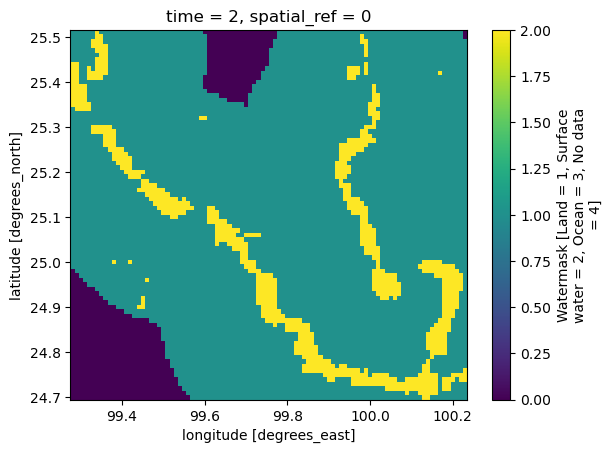

In [11]:
fw_multi.isel(time=2).plot()